In [13]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [2]:
data = pd.read_csv('../bases_dados/credit_data.csv')
data.dropna(inplace=True)
data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [8]:
x = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values

In [9]:
min(x[0]), max(x[0])

(59.0170150669292, 66155.9250950813)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
min(x[0]), max(x[0])

(1.2019070702053862, 1.4538977547824534)

In [16]:
resultados_naive = []
resultados_logistica = []
resultados_forest = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, x, y, cv=kfold)
    resultados_naive.append(scores.mean())
    
    reg_logistica = LogisticRegression()
    scores = cross_val_score(reg_logistica, x, y, cv=kfold)
    resultados_logistica.append(scores.mean())
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, x, y, cv=kfold)
    resultados_forest.append(scores.mean())

In [17]:
resultados_naive = np.array(resultados_naive)
resultados_logistica = np.array(resultados_logistica)
resultados_forest = np.array(resultados_forest)

resultados_naive.mean(), resultados_logistica.mean(), resultados_forest.mean()

(0.9249859296482411, 0.9457008375209381, 0.986813567839196)

**A diferença entre os algoritmos é realmente importante? Florestas Randomicas realmente são o melhor algoritmo em realação ao outros?**

O que nos interessa é o valor de p (pvalue)

## Teste de Shapiro-Wilk

In [18]:
alpha = 0.05

In [19]:
from scipy.stats import shapiro

shapiro(resultados_naive), shapiro(resultados_logistica), shapiro(resultados_forest)

(ShapiroResult(statistic=0.9646671414375305, pvalue=0.4051830470561981),
 ShapiroResult(statistic=0.9463143944740295, pvalue=0.13459184765815735),
 ShapiroResult(statistic=0.9781821966171265, pvalue=0.7754347920417786))

In [20]:
import seaborn as sns

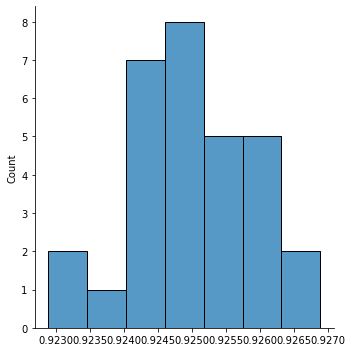

In [22]:
sns.displot(resultados_naive);

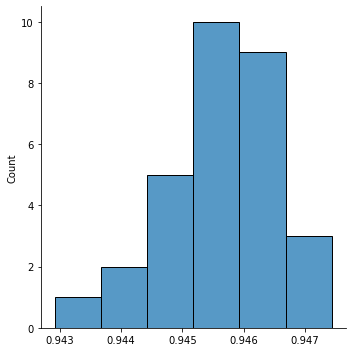

In [23]:
sns.displot(resultados_logistica);

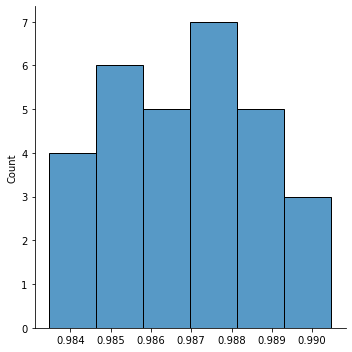

In [24]:
sns.displot(resultados_forest);

## Teste D'Agostino K²

In [25]:
from scipy.stats import normaltest

normaltest(resultados_naive), normaltest(resultados_logistica), normaltest(resultados_forest)

(NormaltestResult(statistic=0.8391668731677201, pvalue=0.6573205784978502),
 NormaltestResult(statistic=4.079254883823804, pvalue=0.1300771631514313),
 NormaltestResult(statistic=1.0829156054734148, pvalue=0.5818993393011096))

## Teste de Anderson-Darling

In [27]:
from scipy.stats import anderson

anderson(resultados_naive).statistic

0.5456346672421084

In [28]:
anderson(resultados_logistica).statistic

0.6048933015735969

In [29]:
anderson(resultados_forest).statistic

0.23665551856791467

# Testes não paramétricos

- https://www.statisticshowto.com/parametric-and-non-parametric-data/#:~:text=Nonparametric%20tests%20can%20perform%20well,20%20items%20in%20each%20group).

If at all possible, you should us parametric tests, as they tend to be more accurate. Parametric tests have greater statistical power, which means they are likely to find a true significant effect. Use nonparametric tests only if you have to (i.e. you know that assumptions like normality are being violated). Nonparametric tests can perform well with non-normal continuous data if you have a sufficiently large sample size (generally 15-20 items in each group).

## Teste de Wilcoxon Signed-Rank

alpha = 0.05

In [31]:
from scipy.stats import wilcoxon

In [37]:
_, p = wilcoxon(resultados_naive, resultados_logistica)
p

1.7333066441991056e-06

In [38]:
_, p = wilcoxon(resultados_naive, resultados_forest)
p

1.7333066441991056e-06

In [39]:
_, p =wilcoxon(resultados_logistica, resultados_forest)
p

1.7343976283205784e-06

## Teste de Friedman

In [40]:
from scipy.stats import friedmanchisquare

In [43]:
_, p = friedmanchisquare(resultados_naive, resultados_logistica, resultados_forest)
p

9.357622968840163e-14

## Teste de Nemenyi